<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


#### Install the required libraries and import them


In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib_venn import venn2
import matplotlib.ticker as mticker
import seaborn as sns
import requests
from tqdm.notebook import tqdm
from urllib.parse import urlparse

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
import sqlite3

#### Connect to the SQLite database


In [3]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [4]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)

   COUNT(*)
0     65437


**Demo 2: List all tables**


In [5]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)

Table_Name
0       main

**Demo 3: Group data by age**


In [6]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)

                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


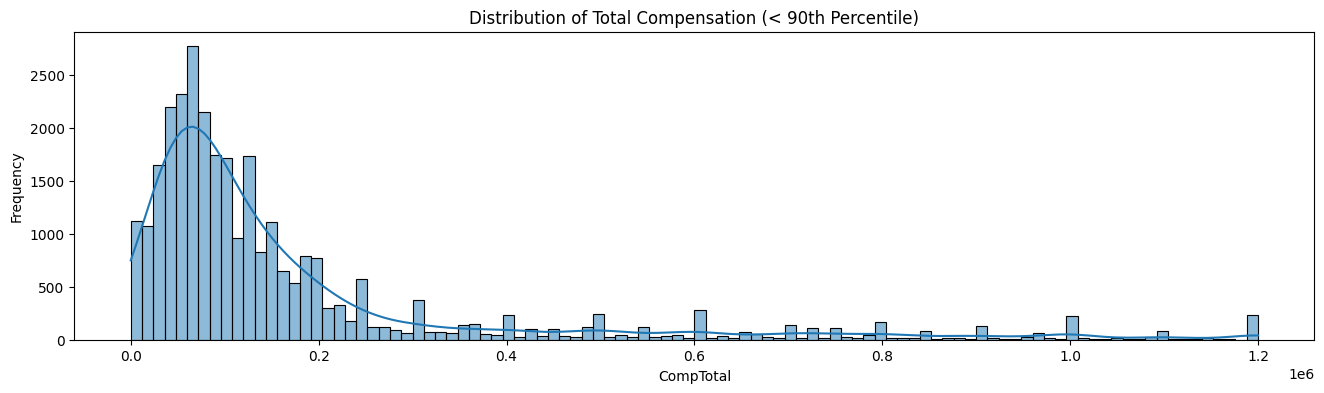

In [7]:
query = """
SELECT CompTotal FROM main
"""

compTotal = pd.read_sql(con=conn, sql=query)

quantile_90 = compTotal["CompTotal"].quantile(0.90)
# Limiting to 90th percentile since data being squashed into 1 bin near the left
compTotal_bot_90 = compTotal[compTotal["CompTotal"] <= quantile_90]

plt.figure(figsize=(16,4))
sns.histplot(data=compTotal_bot_90, x="CompTotal", bins=100, kde=True)
# plt.xscale("log")
plt.title("Distribution of Total Compensation (< 90th Percentile)")
plt.xlabel("CompTotal")
plt.ylabel("Frequency")
plt.savefig("Lab 17 Plots/Step 1-1 CompTotal Bottom 90%")
plt.show()

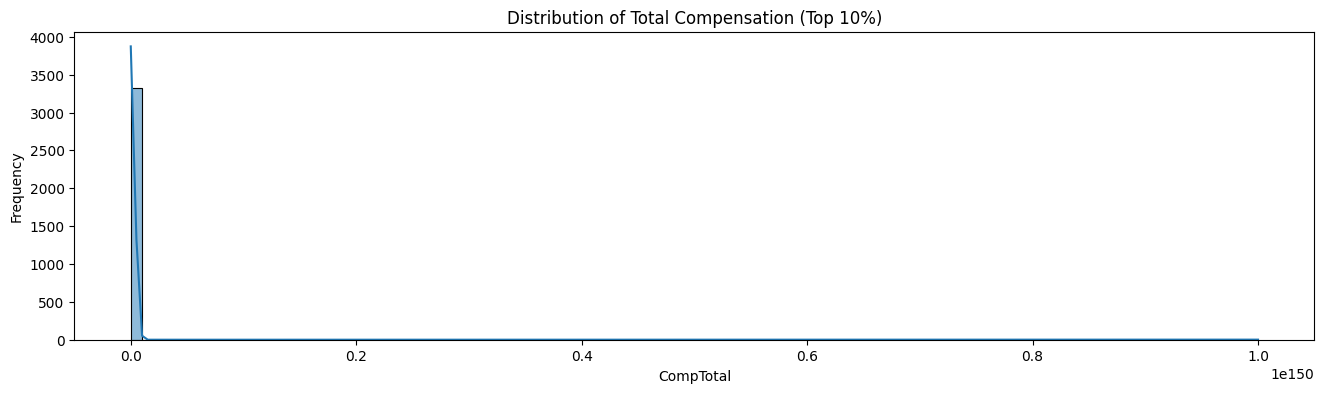

In [8]:
# Showing top 10%
compTotal_top_10 = compTotal[compTotal["CompTotal"] > compTotal["CompTotal"].quantile(0.90)]

plt.figure(figsize=(16,4))
sns.histplot(data=compTotal_top_10, x="CompTotal", bins=100, kde=True)
plt.title("Distribution of Total Compensation (Top 10%)")
plt.xlabel("CompTotal")
plt.ylabel("Frequency")
plt.savefig("Lab 17 Plots/Step 1-1 CompTotal Top 10%")
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


In [9]:
query = """
SELECT YearsCodePro FROM main
"""

yearsCodePro = pd.read_sql(sql=query, con=conn)

In [10]:
exp_map = {
    "Less than 1 year":0.5,
    "More than 50 years":50
}
yearsCodePro["YearsCodePro"] = yearsCodePro["YearsCodePro"].replace(exp_map).dropna()
yearsCodePro["YearsCodePro"] = pd.to_numeric(yearsCodePro["YearsCodePro"], errors="coerce")

yearsCodePro["YearsCodePro"].value_counts(dropna=False).sort_index()

YearsCodePro
0.5      2856
1.0      2639
2.0      4168
3.0      4093
4.0      3215
5.0      3526
6.0      2843
7.0      2517
8.0      2549
9.0      1493
10.0     3251
11.0     1312
12.0     1777
13.0     1127
14.0     1082
15.0     1635
16.0      946
17.0      814
18.0      867
19.0      516
20.0     1549
21.0      380
22.0      492
23.0      448
24.0      632
25.0      998
26.0      426
27.0      380
28.0      342
29.0      196
30.0      689
31.0      106
32.0      194
33.0      132
34.0      169
35.0      285
36.0      119
37.0      104
38.0      134
39.0       54
40.0      194
41.0       51
42.0       55
43.0       37
44.0       42
45.0       56
46.0       21
47.0       10
48.0       14
49.0       11
50.0       64
NaN     13827
Name: count, dtype: int64

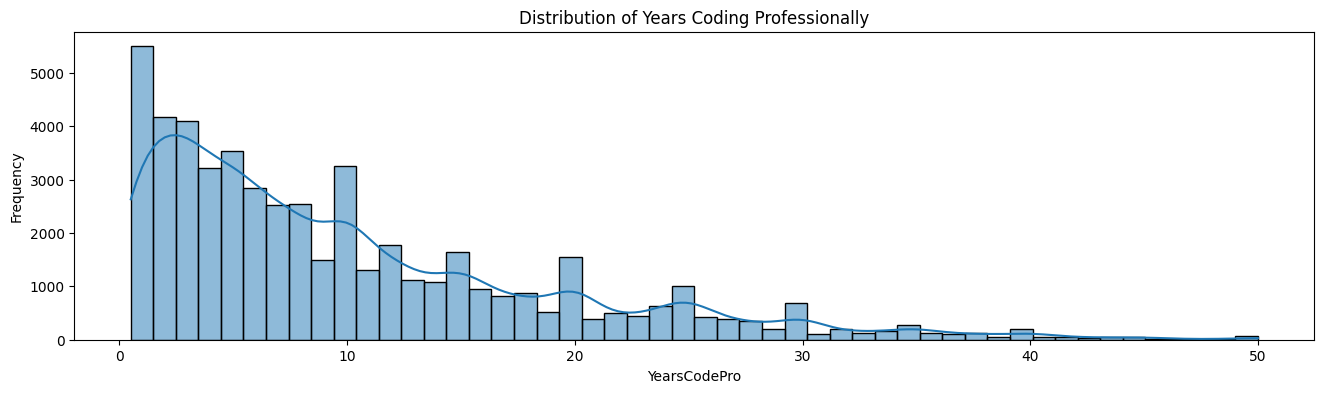

In [11]:
plt.figure(figsize=(16,4))
sns.histplot(data=yearsCodePro, x="YearsCodePro", bins=50, kde=True)
plt.title("Distribution of Years Coding Professionally")
plt.xlabel("YearsCodePro")
plt.ylabel("Frequency")
plt.savefig("Lab 17 Plots/Step 1-2 YearsCodePro")
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


In [12]:
pd.set_option('display.float_format', '{:,.2f}'.format)

In [13]:
query = """
SELECT CompTotal, Age FROM main
"""

comp_age = pd.read_sql(sql=query, con=conn).sort_values(by="Age")

In [14]:
comp_age = comp_age.dropna(subset="CompTotal")

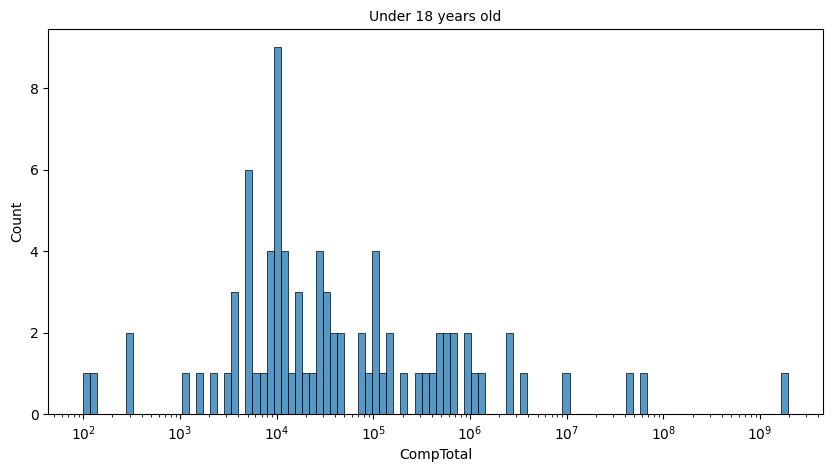

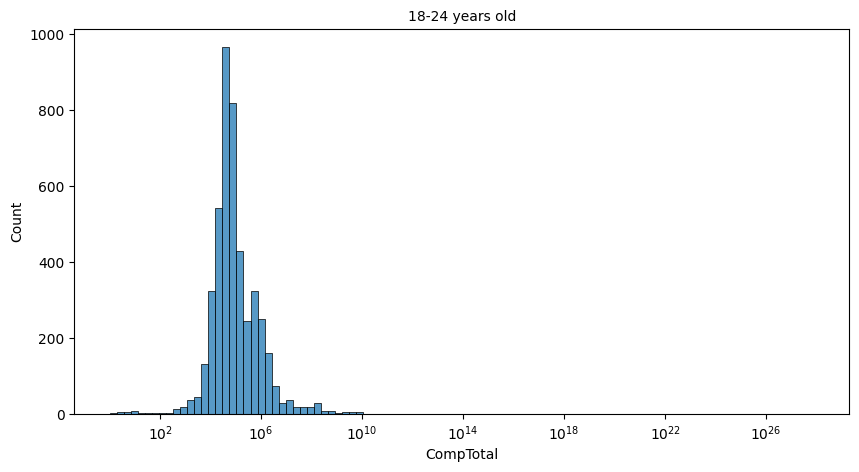

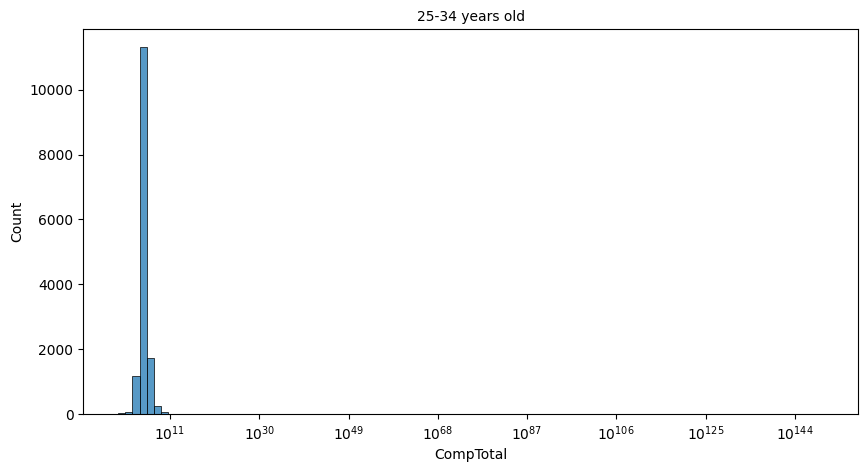

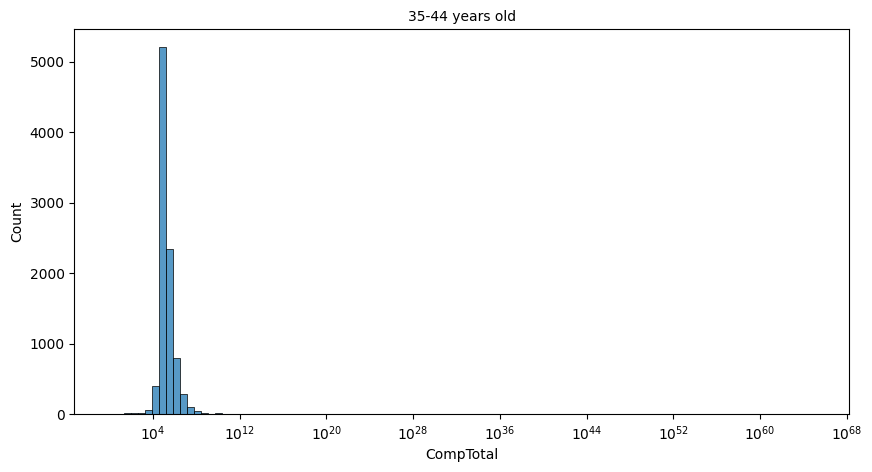

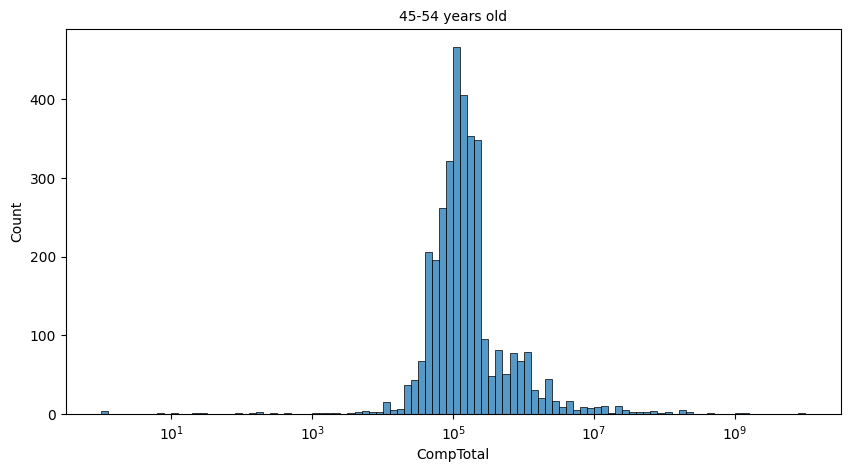

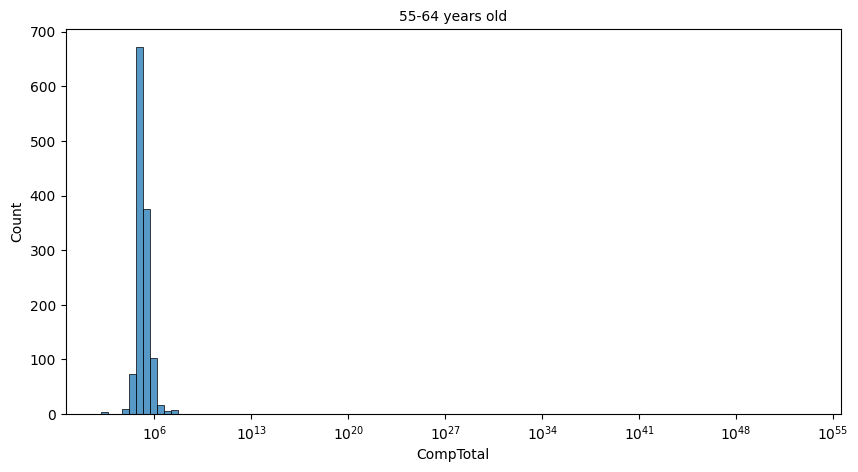

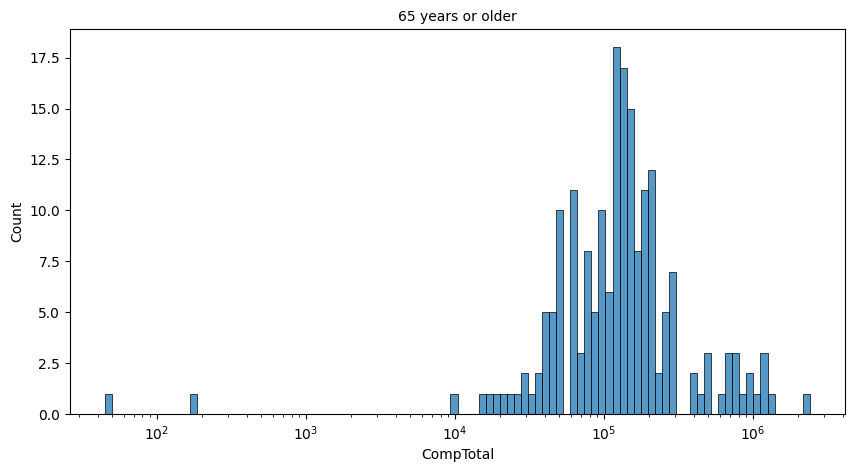

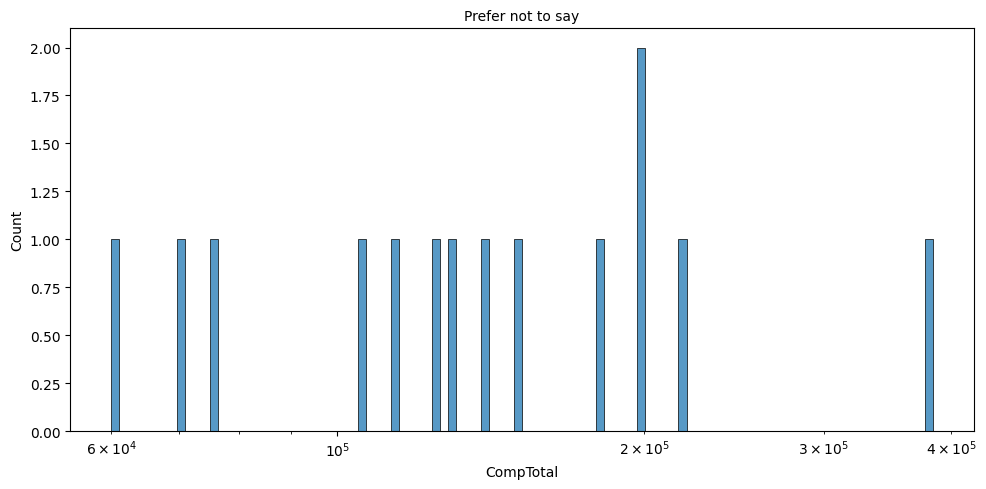

In [15]:
# Extract Age Groups
age_groups = list(comp_age["Age"].unique())
age_groups = [age_groups[-1]] + age_groups[:-1]

for age in age_groups:
    age_group = comp_age.loc[comp_age["Age"] == age, "CompTotal"].dropna()
    plt.figure(figsize=(10,5))
    sns.histplot(data=age_group, bins=100, log_scale=True)

    plt.title(f"{age}", fontsize=10)
    plt.ylabel("Count")
    plt.xlabel("CompTotal")
    plt.savefig(f"Lab 17 Plots/Step 2-1 CompTotal by Age ({age})")

# Tidy up spacing so titles/labels don't overlap
plt.tight_layout()
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


In [16]:
query = """
SELECT TimeSearching, Age FROM main
"""

time_search_age = pd.read_sql(sql=query, con=conn).sort_values(by="Age")

In [17]:
time_search_age = time_search_age.dropna(subset="TimeSearching")
search_order = list(time_search_age["TimeSearching"].unique())
search_order = [search_order[2]] + search_order[:2] + search_order[3:]

time_search_age["TimeSearching"] = pd.Categorical(
    time_search_age["TimeSearching"],
    categories=search_order,
    ordered=True
)

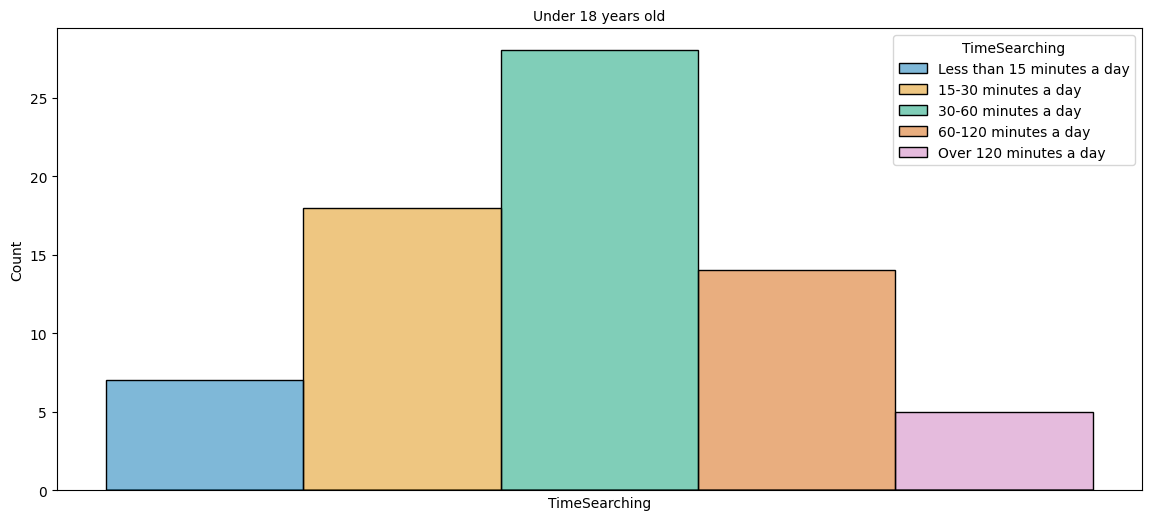

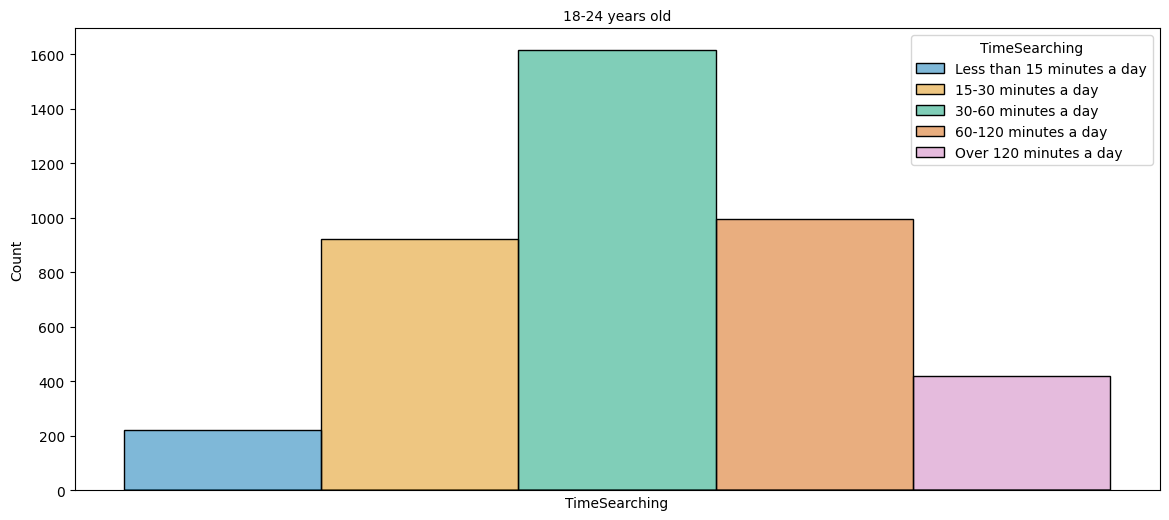

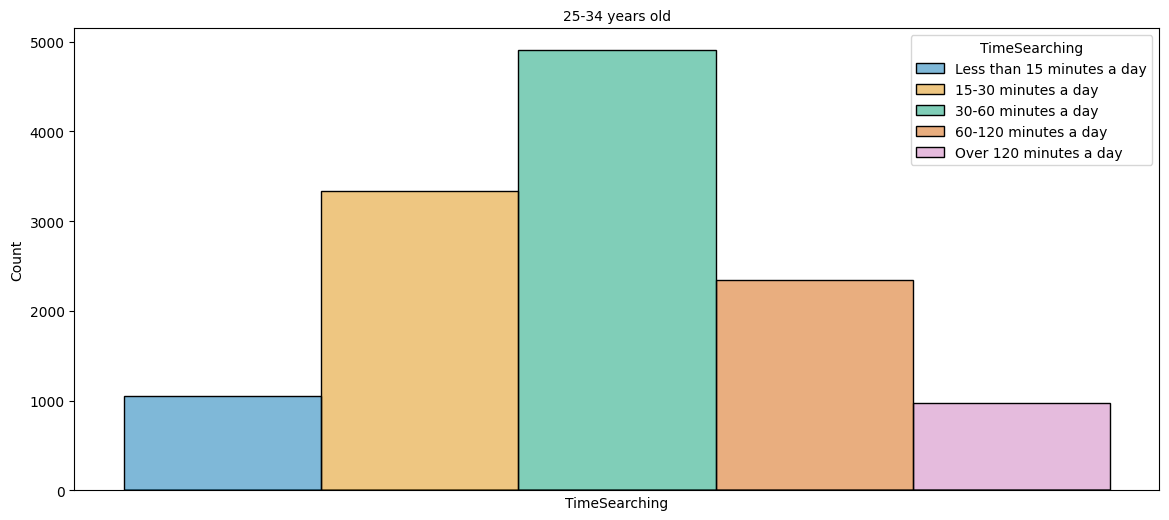

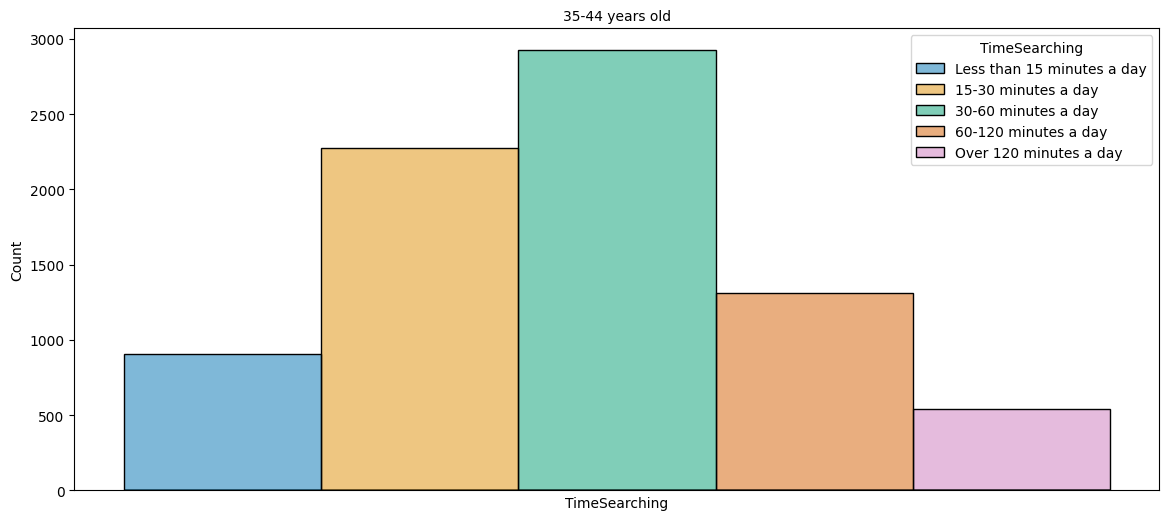

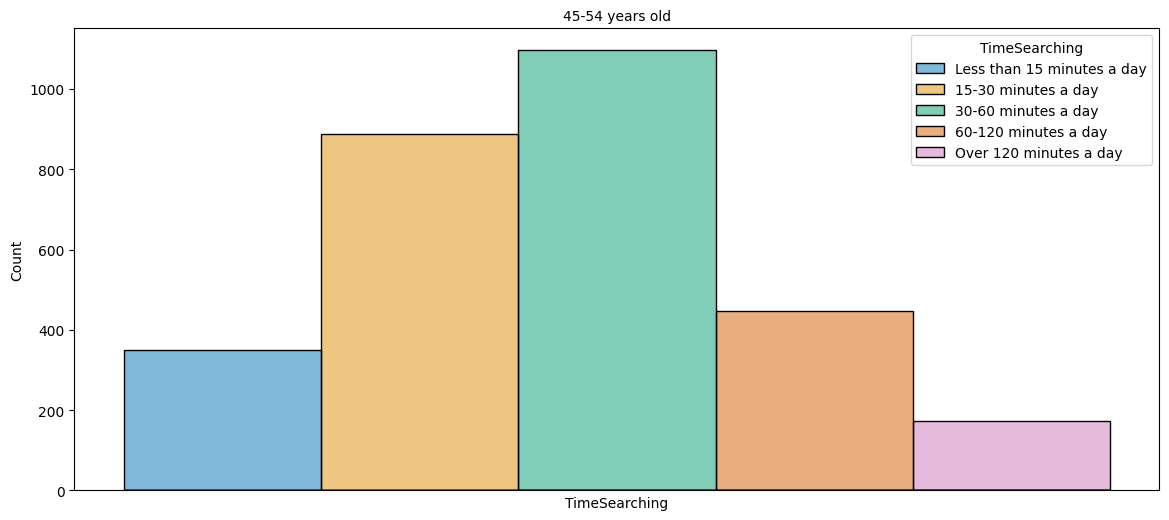

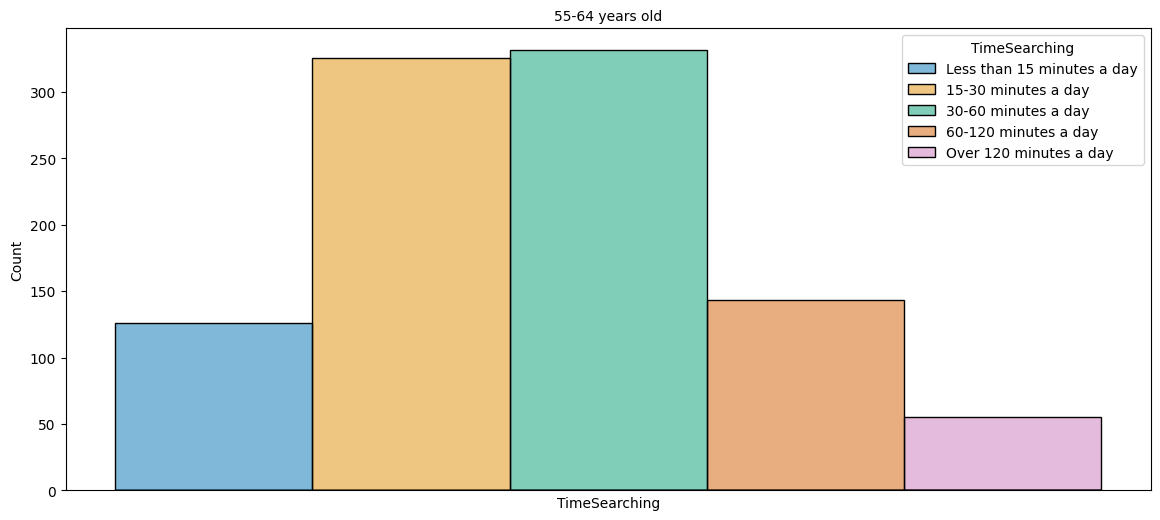

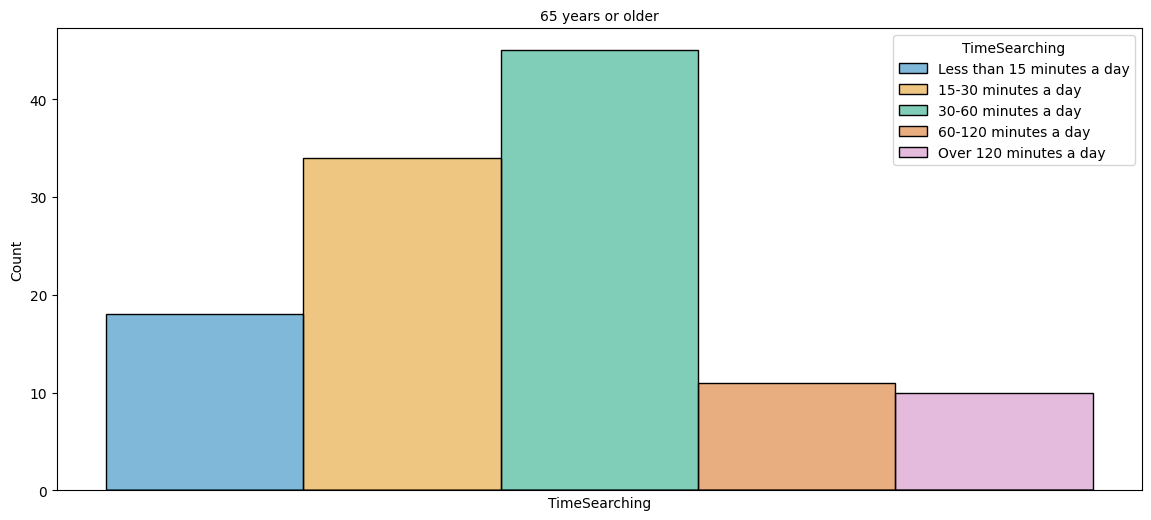

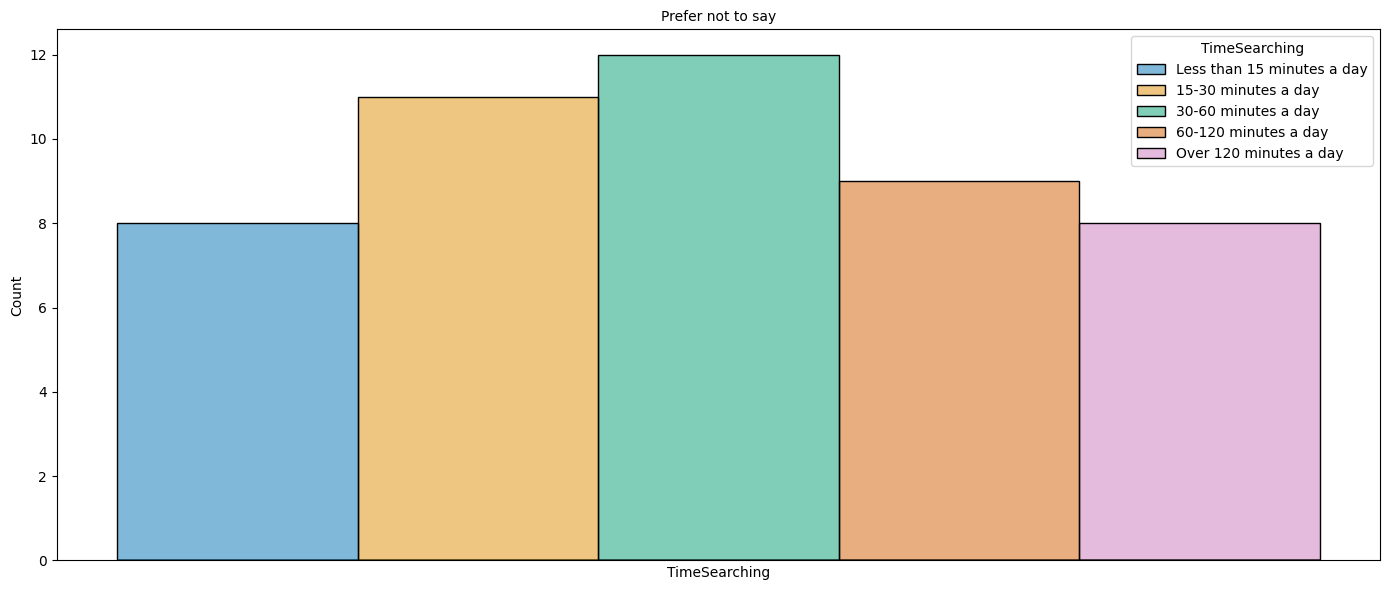

In [18]:
for age in age_groups:
    age_group = time_search_age.loc[time_search_age["Age"] == age, :].dropna()
    plt.figure(figsize=(14,6))
    sns.histplot(data=age_group, x="TimeSearching", bins=len(search_order), legend=True, hue="TimeSearching", palette="colorblind")

    plt.title(f"{age}", fontsize=10)
    plt.ylabel("Count")
    plt.xlabel("TimeSearching")
    plt.xticks([])
    plt.savefig(f"Lab 17 Plots/Step 2-2 TimeSearching by Age ({age})")


# Tidy up spacing so titles/labels don't overlap
plt.tight_layout()
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


In [19]:
query = """
SELECT DatabaseWantToWorkWith FROM main
"""

db_want = pd.read_sql(sql=query, con=conn)
db_want_exploded = db_want.copy().loc[:,"DatabaseWantToWorkWith"].str.split(";").explode().to_frame()
db_want_exploded = db_want_exploded.dropna()
counts = db_want_exploded["DatabaseWantToWorkWith"].value_counts(dropna=False).to_frame(name='Count').head(5)
top5 = list(counts.index)
db_want_exploded = db_want_exploded[db_want_exploded["DatabaseWantToWorkWith"].isin(top5)]
db_want_exploded["DatabaseWantToWorkWith"].unique()

array(['PostgreSQL', 'MongoDB', 'MySQL', 'SQLite', 'Redis'], dtype=object)

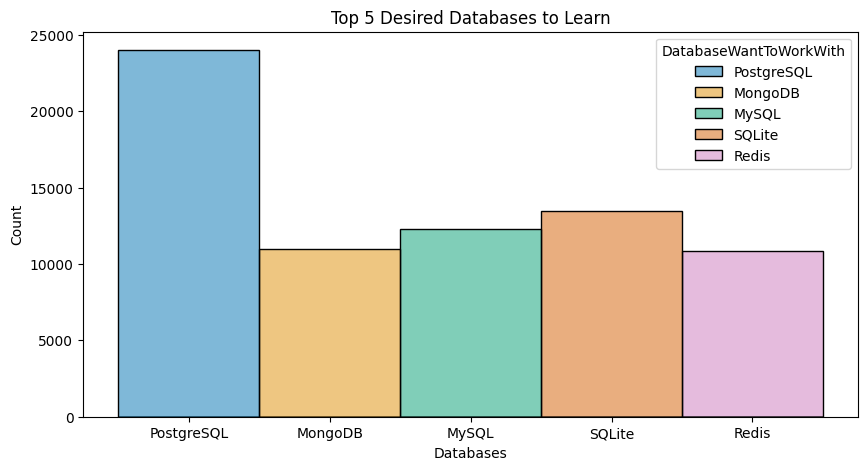

In [30]:
plt.figure(figsize=(10,5))
sns.histplot(data=db_want_exploded, x="DatabaseWantToWorkWith", hue="DatabaseWantToWorkWith", palette='colorblind')
plt.title("Top 5 Desired Databases to Learn")
plt.xlabel("Databases")
plt.savefig("Lab 17 Plots/Step 3-1 Top 5 Desired Databases")

plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


In [21]:
query = """
SELECT RemoteWork FROM main
"""

remote_work = pd.read_sql(sql=query, con=conn)
remote_work_exploded = remote_work.copy().loc[:,"RemoteWork"].str.split(";").explode().to_frame()
remote_work_exploded = remote_work_exploded.dropna()
counts = remote_work_exploded["RemoteWork"].value_counts(dropna=False).to_frame(name='Count')
counts

Count
RemoteWork                                 
Hybrid (some remote, some in-person)  23015
Remote                                20831
In-person                             10960

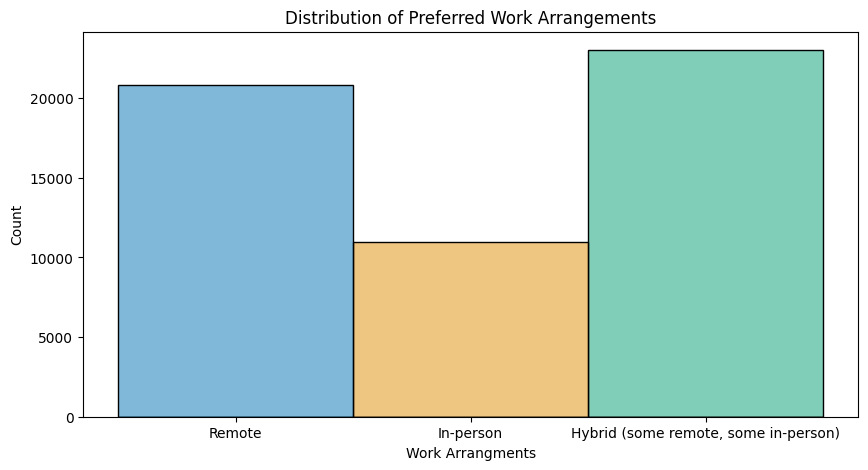

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(data=remote_work_exploded, x="RemoteWork", hue="RemoteWork", palette='colorblind', legend=False)
plt.title("Distribution of Preferred Work Arrangements")
plt.xlabel("Work Arrangments")
plt.savefig("Lab 17 Plots/Step 3-2 Distribution of Preferred Work Arrangements")

plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


In [23]:
query = """
SELECT CompTotal, Age FROM main
"""

comp_age = pd.read_sql(sql=query, con=conn).sort_values(by="Age")
comp_age = comp_age.dropna(subset="CompTotal")

In [24]:
fiftyFive_sixtyFour_median = comp_age.copy().loc[comp_age['Age'] == "55-64 years old", "CompTotal"].median()
# fiftyFive_sixtyFour_median

mid_career = comp_age.copy().loc[((comp_age['Age'] == "55-64 years old") & (comp_age['CompTotal'] < fiftyFive_sixtyFour_median)) | (comp_age['Age'] == "45-54 years old"), :]
mid_career

CompTotal              Age
29288        720,000.00  45-54 years old
2318         160,000.00  45-54 years old
25015        221,000.00  45-54 years old
6750         250,000.00  45-54 years old
21319         90,000.00  45-54 years old
24929        140,000.00  45-54 years old
30452        110,000.00  45-54 years old
56656         65,000.00  45-54 years old
36148        125,000.00  45-54 years old
20606        115,000.00  45-54 years old
1363         160,000.00  45-54 years old
55621        250,000.00  45-54 years old
36910        130,000.00  45-54 years old
2136          80,000.00  45-54 years old
56845      8,800,000.00  45-54 years old
2403         186,000.00  45-54 years old
2411         130,000.00  45-54 years old
3077         550,000.00  45-54 years old
6746               0.00  45-54 years old
2316       1,000,000.00  45-54 years old
6761         192,000.00  45-54 years old
55749        250,000.00  45-54 years old
21209        149,000.00  45-54 years old
6764          22,000.00  45-54 years old
2404         165,000.00  45-54 years old
6775         120,000.00  45-54 years old
21206        100,000.00  45-54 years old
29317         36,000.00  45-54 years old
55679         95,000.00  45-54 years old
30445        100,000.00  45-54 years old
7490          70,000.00  45-54 years old
55694        100,000.00  45-54 years old
36062        170,000.00  45-54 years old
62814         30,000.00  45-54 years old
30351        250,000.00  45-54 years old
61730        206,000.00  45-54 years old
7489          65,000.00  45-54 years old
36058        175,000.00  45-54 years old
55696      1,200,000.00  45-54 years old
36973        200,000.00  45-54 years old
55697        220,000.00  45-54 years old
29457        252,000.00  45-54 years old
62584         60,000.00  45-54 years old
36076        230,000.00  45-54 years old
30422        210,000.00  45-54 years old
36075        120,000.00  45-54 years old
31163        200,000.00  45-54 years old
30393        850,000.00  45-54 years old
21250         80,000.00  45-54 years old
25539      4,300,000.00  45-54 years old
20647      3,000,000.00  45-54 years old
36055        120,000.00  45-54 years old
7478         120,000.00  45-54 years old
6670         100,000.00  45-54 years old
21265        170,000.00  45-54 years old
6672          30,000.00  45-54 years old
62555        100,000.00  45-54 years old
56751      1,147,462.00  45-54 years old
30412        213,000.00  45-54 years old
3027       1,400,000.00  45-54 years old
62557        750,000.00  45-54 years old
6668         225,000.00  45-54 years old
24984        570,000.00  45-54 years old
36972        200,000.00  45-54 years old
20648         61,300.00  45-54 years old
6663         285,000.00  45-54 years old
3037         130,000.00  45-54 years old
56763         71,000.00  45-54 years old
25534         48,000.00  45-54 years old
1352         190,000.00  45-54 years old
2151          85,000.00  45-54 years old
7476          92,000.00  45-54 years old
21264     60,000,000.00  45-54 years old
2323         180,000.00  45-54 years old
36082        170,000.00  45-54 years old
21221        190,000.00  45-54 years old
2325         133,000.00  45-54 years old
56669         50,000.00  45-54 years old
30438        100,000.00  45-54 years old
35986         85,000.00  45-54 years old
55719  1,000,000,000.00  45-54 years old
25555        500,000.00  45-54 years old
7513          97,000.00  45-54 years old
20676      1,000,000.00  45-54 years old
6733          80,000.00  45-54 years old
1491         170,000.00  45-54 years old
36999        100,000.00  45-54 years old
30199        155,000.00  45-54 years old
2397         100,000.00  45-54 years old
55729        100,000.00  45-54 years old
20685      3,500,000.00  45-54 years old
35979         84,000.00  45-54 years old
30441        140,000.00  45-54 years old
56662        200,000.00  45-54 years old
29452        220,207.00  45-54 years old
3059         600,000.00  45-54 years old
21219        250,000.00  45-54 years 

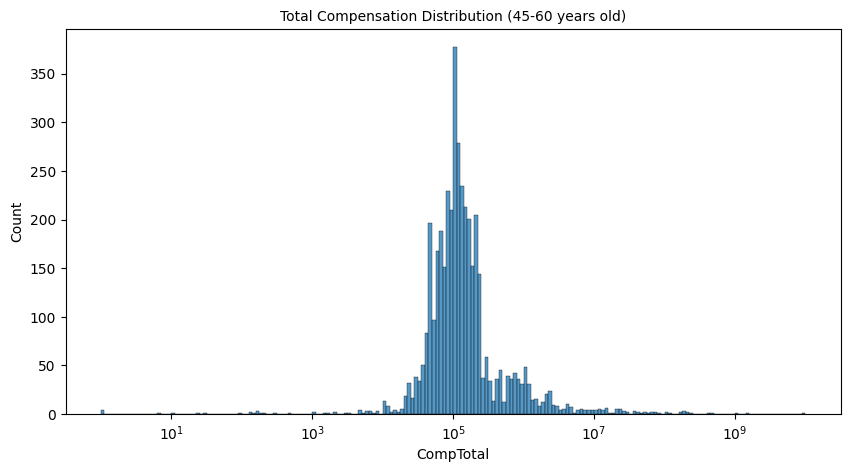

In [25]:
plt.figure(figsize=(10,5))
sns.histplot(data=mid_career, x='CompTotal', bins=200, log_scale=True)

plt.title("Total Compensation Distribution (45-60 years old)", fontsize=10)
plt.ylabel("Count")
plt.xlabel("CompTotal")

plt.savefig("Lab 17 Plots/Step 4-1 CompTotal Distribution (45-60 years old)")
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [26]:
query = """
SELECT YearsCodePro, JobSat FROM main
"""

years_sat = pd.read_sql(sql=query, con=conn)
years_sat = years_sat.dropna(subset=["JobSat"])
years_sat["YearsCodePro"] = years_sat["YearsCodePro"].replace({"Less than 1 year":"0.5","More than 50 years":"51"})
years_sat["YearsCodePro"] = pd.to_numeric(years_sat["YearsCodePro"], errors='coerce')

years_sat["YearsCodePro"] = years_sat["YearsCodePro"].fillna(years_sat["YearsCodePro"].median())

In [27]:
years_sat

YearsCodePro  JobSat
10             8.00    8.00
12            12.00    8.00
15            27.00    5.00
18            10.00   10.00
20             0.50    6.00
22            18.00    9.00
24            15.00    4.00
26            17.00    7.00
27             6.00    7.00
31             7.00    7.00
33            16.00    6.00
35             6.00    7.00
40             7.00    7.00
41            12.00    7.00
43            14.00    9.00
44             7.00    9.00
45             4.00    7.00
46            15.00    6.00
49             4.00    3.00
53             6.00    3.00
54             8.00    7.00
57             2.00    6.00
61            29.00    7.00
63             5.00    9.00
64             8.00    9.00
69             8.00    9.00
71            30.00    7.00
72             1.00   10.00
73            10.00    9.00
74            30.00    7.00
76            25.00    6.00
77             5.00    7.00
78            24.00    8.00
79            26.00    8.00
80            10.00    7.00
81             9.00    7.00
82            20.00    4.00
83             4.00    2.00
86            29.00    8.00
89             8.00    8.00
92            37.00    4.00
93             4.00    6.00
95             2.00    3.00
96             7.00    7.00
98             1.00    8.00
100           11.00    2.00
101            3.00    7.00
102            8.00    8.00
105            3.00    1.00
107            6.00    9.00
110            6.00    4.00
112           13.00    9.00
115           12.00    7.00
116           27.00    7.00
117            5.00    8.00
120            3.00    8.00
121           30.00    8.00
123            8.00    8.00
124           12.00   10.00
126            8.00    8.00
129           30.00    6.00
130           18.00    8.00
131            9.00    8.00
132            3.00    6.00
133            2.00    7.00
141            5.00    9.00
142            6.00    8.00
144            6.00   10.00
145            1.00    3.00
146           17.00    9.00
148            6.00    8.00
149           13.00   10.00
152            4.00    7.00
154           11.00   10.00
157            4.00    3.00
158            5.00    6.00
159            3.00    2.00
160            0.50    6.00
161            5.00    7.00
162            6.00    6.00
163           19.00    8.00
165           16.00   10.00
168            8.00    8.00
169           21.00    6.00
173            0.50    5.00
175            2.00    6.00
176           15.00    7.00
177            2.00    7.00
180            6.00    6.00
182            8.00    9.00
186            1.00    8.00
188            8.00    7.00
190           30.00    9.00
191           15.00    8.00
193            8.00   10.00
199           25.00    9.00
204           12.00    8.00
206           15.00    9.00
208            4.00    3.00
209            9.00    6.00
212            2.00    8.00
214           10.00    5.00
215            5.00    9.00
217            8.00    8.00
220           17.00    8.00
223            5.00    1.00
225            9.00    8.00
226           12.00   10.00
228           23.00    7.00
230            3.00    6.00
232            5.00   10.00
236           11.00    3.00
237           14.00    6.00
241           20.00   10.00
242            3.00    7.00
244            4.00    8.00
245           25.00    9.00
248           19.00    7.00
249            2.00    6.00
251           18.00   10.00
252           34.00    9.00
253           15.00    9.00
255           15.00    4.00
256            6.00    8.00
260           12.00    6.00
261            3.00    5.00
265            6.00    7.00
266            9.00    9.00
269            7.00    5.00
270           12.00    9.00
272           10.00    5.00
273           24.00    8.00
274            4.00    7.00
275           10.00    5.00
276            1.00    8.00
279           24.00    7.00
281            4.00    8.00
283            3.00    7.00
285            2.00    6.00
286           20.00    8.00
287           15.00    7.00
288           28.00   10.00
290

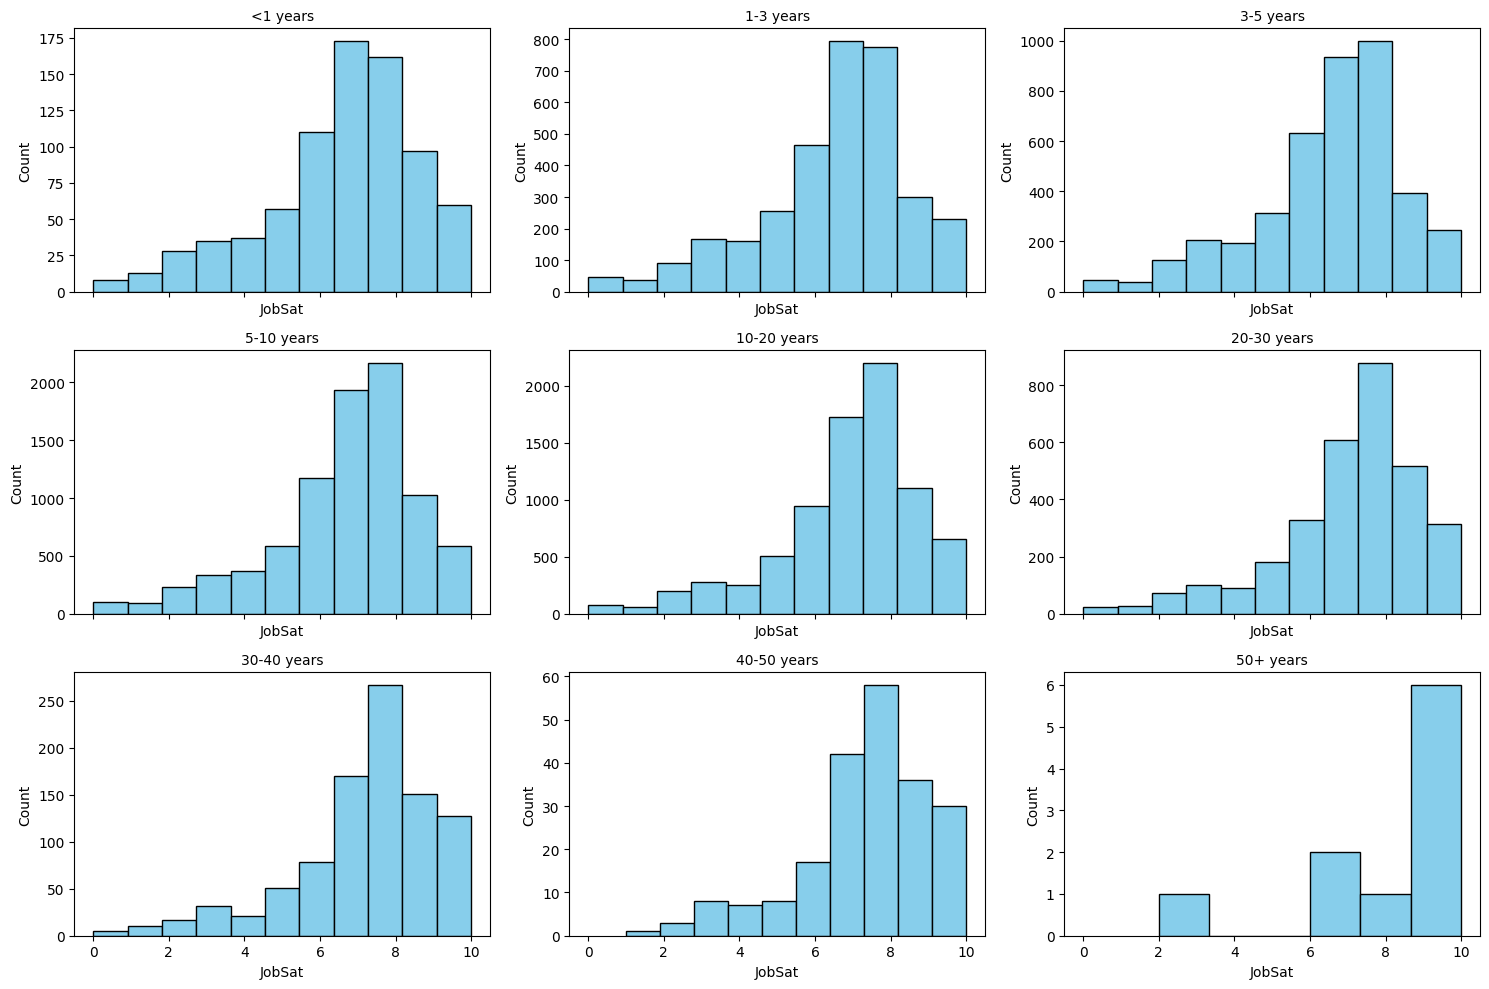

In [28]:
# Bin YearsCodePro into ranges
bins = [0, 1, 3, 5, 10, 20, 30, 40, 50, 60]
labels = ["<1", "1-3", "3-5", "5-10", "10-20", "20-30", "30-40", "40-50", "50+"]
years_sat["YearsCodeProBin"] = pd.cut(years_sat["YearsCodePro"], bins=bins, labels=labels, right=False)

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10), sharex=True, sharey=False)
axes = axes.flatten()

# Loop through bins and plot JobSat histogram
for i, bin_label in enumerate(labels):
    subset = years_sat.loc[years_sat["YearsCodeProBin"] == bin_label, "JobSat"]
    axes[i].hist(subset, bins=len(subset.unique()), color="skyblue", edgecolor="black")
    axes[i].set_title(f"{bin_label} years", fontsize=10)
    axes[i].set_xlabel("JobSat")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.savefig("Lab 17 Plots/Step 4-2 JobSat by YearsCodePro")
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [29]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
